In [27]:
import pickle
from prettytable import PrettyTable
import numpy as np
import csv
import matplotlib.pyplot as plt

In [28]:
#Define the filename to load from
pkl_file = '2Nov.pkl'

# Load the dictionary from the file
with open(pkl_file, 'rb') as f:
    D = pickle.load(f)

# Use the dictionary in your code
print(D)

{1: (10.0, 3.0), 2: (10.0, 6.0), 3: (9.0, 1.0), 4: (9.0, 3.0), 5: (10.0, 7.0), 6: (9.0, 7.0), 7: (10.0, 1.0), 8: (10.0, 5.0), 9: (10.0, 2.0), 10: (9.0, 2.0), 11: (9.0, 5.0), 12: (24.0, 3.0), 13: (24.0, 5.0), 14: (24.0, 2.0), 15: (24.0, 1.0), 16: (25.0, 1.0), 17: (25.0, 3.0), 18: (23.0, 6.0), 19: (23.0, 3.0), 20: (23.0, 2.0), 21: (8.0, 6.0), 22: (8.0, 5.0), 23: (27.0, 7.0), 24: (8.0, 3.0), 25: (8.0, 2.0), 26: (8.0, 1.0), 27: (2.0, 6.0), 28: (2.0, 7.0), 29: (2.0, 5.0), 30: (12.0, 6.0), 31: (13.0, 5.0), 32: (12.0, 2.0), 33: (13.0, 6.0), 34: (12.0, 3.0), 35: (12.0, 5.0), 36: (13.0, 3.0), 37: (13.0, 2.0), 38: (11.0, 6.0), 39: (11.0, 5.0), 40: (2.0, 2.0), 41: (2.0, 3.0), 42: (24.0, 6.0), 43: (22.0, 2.0), 44: (27.0, 3.0), 45: (27.0, 5.0), 46: (2.0, 1.0), 47: (15.0, 5.0), 48: (21.0, 7.0), 49: (21.0, 6.0), 50: (14.0, 7.0), 51: (28.0, 1.0), 52: (18.0, 7.0), 53: (4.0, 6.0), 54: (5.0, 2.0), 55: (4.0, 2.0), 56: (5.0, 7.0), 57: (4.0, 5.0), 58: (5.0, 3.0), 59: (5.0, 6.0), 60: (5.0, 5.0), 61: (4.0, 3.

In [29]:
date = pkl_file[0:-4]
csv_file = date + ".csv"


Passengers = dict() # Dictionnaire qui définit les passagers
Groupes = dict() # Dictionnaire qui définit les groupes
M = 0
B = 0
Enfants_Y = 0
Adultes_Y = 0
Enfants_J = 0
Adultes_J = 0
Cap_max = 0

# Chargement des donnees

with open(csv_file) as DataFile:
    reader = csv.DictReader(DataFile)
    for row in reader:
        d = int(float(row['Numero du groupe']))

        if row["Femmes"] == '': row["Femmes"] = 0
        if row["Hommes"] == '': row["Hommes"] = 0
        if row["Enfants"] == '': row["Enfants"] = 0
        if row["WCHR"] == '': row["WCHR"] = 0
        if row["WCHB"] == '': row["WCHB"] = 0
        if row["TransitTime"][1] == ":" : row["TransitTime"] = "0" + row["TransitTime"]
        if row["TransitTime"][:2] == "12" : row["TransitTime"] = "00" + row["TransitTime"][2:]

        Gcount = int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHR'])) + int(float(row['WCHB']))
        if row['Classe'] == 'Y' :
            Enfants_Y += int(float(row['Enfants']))
            Adultes_Y += int(float(row['Hommes'])) + int(float(row['Femmes']))
        Cap_max = int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + 4*int(float(row['WCHR'])) + 12*int(float(row['WCHB']))

        if row["Classe"] == "J":
            B += int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHR'])) + int(float(row['WCHB']))
            Enfants_J += int(float(row['Enfants']))
            Adultes_J += int(float(row['Hommes'])) + int(float(row['Femmes']))

            
        if int(float(row['Femmes'])) > 0 :
            for i in range(M+1,M+int(float(row['Femmes'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Femme', "Classe" : row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['Hommes'])) > 0 :
            for i in range(M+int(float(row['Femmes'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Homme', "Classe" : row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['Enfants'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'Enfant', "Classe": row['Classe'], "TransitTime" : int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['WCHB'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB']))+1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'WCHB', "Classe" : row['Classe'], "TransitTime": int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        if int(float(row['WCHR'])) > 0 :
            for i in range(M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB'])) + 1,M + int(float(row['Femmes'])) + int(float(row['Hommes'])) + int(float(row['Enfants'])) + int(float(row['WCHB'])) + int(float(row['WCHR'])) + 1):
                Passengers[i] = {"Numero de groupe" : d, "Cardinal du Groupe" : Gcount, "Type": 'WCHR', "Classe" : row['Classe'], "TransitTime": int(row['TransitTime'][:2])*60 + int(row['TransitTime'][3:5])}
        Groupes[d] = [i for i in range(M+1,M+Gcount+1)]      
        M += Gcount

In [30]:
Nb_rows = 29 # Nombre de rangées (de 1 à 29)
Nb_rows2 = 7 # Nombre de colonne (A B C (couloir) D E F), 
Nb_passengers = len(D) # Nombre de passagers
Nb_groups = len(Groupes) # Nombre de groupes
Nb_business_passengers = B # Nombre de passager en cabine Business

In [31]:
### Affichage des passagers
A = np.zeros((Nb_rows, Nb_rows2))
for k in range(1, Nb_passengers+1):
    i , j = D[k]
    A[int(i)-1,int(j)-1] = k


print(A)

[[134. 133. 103.   0. 104. 105. 102.]
 [ 46.  40.  41.   0.  29.  27.  28.]
 [113. 114.  88.   0. 100. 136.  87.]
 [ 68.  55.  61.   0.  57.  53.  66.]
 [ 69.  54.  58.   0.  60.  59.  56.]
 [ 65. 110.  62.   0.  67.  63.  64.]
 [101.   0.   0.   0.  97.  96.  98.]
 [ 26.  25.  24.   0.  22.  21. 119.]
 [  3.  10.   4.   0.  11.   0.   6.]
 [  7.   9.   1.   0.   8.   2.   5.]
 [  0. 120. 115.   0.  39.  38.   0.]
 [  0.  32.  34.   0.  35.  30.   0.]
 [  0.  37.  36.   0.  31.  33.   0.]
 [  0. 116. 117.   0.   0. 121.  50.]
 [  0.  94.   0.   0.  47. 123. 124.]
 [118.   0.   0.   0.   0.   0.   0.]
 [  0.  99.  89.   0. 131. 130. 129.]
 [ 81.  82.  76.   0.  71.  77.  52.]
 [ 86.  78.   0.   0.   0.  79.   0.]
 [ 84.  74.  83.   0.  70.  72.   0.]
 [126. 127. 125.   0. 128.  49.  48.]
 [ 75.  43.  73.   0.  85.  80.   0.]
 [  0.  20.  19.   0.   0.  18. 112.]
 [ 15.  14.  12.   0.  13.  42.   0.]
 [ 16.  92.  17.   0.   0.   0.   0.]
 [  0. 122.   0.   0.   0. 108. 109.]
 [ 93. 111. 

In [32]:
T = np.zeros((Nb_rows, Nb_rows2))
for k in range(1, Nb_passengers+1):
    i , j = D[k]
    T[int(i)-1,int(j)-1] = Passengers[k]['TransitTime']


print(T)

[[60. 60. 60.  0. 60. 60. 60.]
 [60. 60. 60.  0. 60. 60. 60.]
 [85. 85. 85.  0. 85. 85. 60.]
 [85. 85. 85.  0. 85. 85. 85.]
 [85. 85. 85.  0. 85. 85. 85.]
 [85. 85. 85.  0. 85. 85. 85.]
 [ 0.  0.  0.  0. 85. 85. 85.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [33]:
B = {}

for k in range(1, Nb_passengers+1):
    i , j = D[k]
    B[int(i),int(j)] = Passengers[k]['Type']

for i in range(1,Nb_rows+1):
    for j in range(1,Nb_rows2+1):
        if (i,j) not in B:
            B[(i,j)] = 'Vide'

# create a dictionary to store the seat number of each child
child_seats = {}
seat_passengers=B
# iterate over all passengers
for k in range(1, Nb_passengers + 1):
    
    # check if the passenger is a child
    if Passengers[k]['Type'] == 'Enfant':
        
        # get the row and column number of the child's seat
        row_num = int(D[k][0])
        col_num = int(D[k][1])
        
        # check if the child is seated next to an adult
        adjacent_seat_found = False
        if Passengers[k]['Classe'] == 'Y':
        
            # check the seat to the left of the child's seat
            if col_num > 1 and seat_passengers[(row_num, col_num - 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
            
            # check the seat to the right of the child's seat
            elif col_num < Nb_rows2 and seat_passengers[(row_num, col_num + 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
        
            
            # if the child is in the first column, check the seat to the right of the child's seat
            elif col_num == 1 and seat_passengers[(row_num, col_num + 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
            
            
            
            # if the child is in the last column, check the seat to the left of the child's seat
            elif col_num == Nb_rows2 and seat_passengers[(row_num, col_num - 1)] in {'Homme', 'Femme'}:
                adjacent_seat_found =True

        if Passengers[k]['Classe'] == 'J':

            if col_num == 1 and seat_passengers[(row_num, col_num + 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 3 and seat_passengers[(row_num, col_num - 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 5 and seat_passengers[(row_num, col_num + 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True

            if col_num == 7 and seat_passengers[(row_num, col_num - 2)] in {'Homme', 'Femme'}:
                adjacent_seat_found = True
    
        if adjacent_seat_found==False:
            child_seats[k] = (row_num, col_num)    #seat_passengers[(row_num, col_num)] = Passengers[k]['Type']
            
# check if all children are seated next to an adult
if len(child_seats) == 0:
    child_result = "All children are seated next to an adult."
    print(child_result)
else:
    child_result = f"{len(child_seats)} children are not seated next to an adult."
    print(f"{len(child_seats)} children are not seated next to an adult. Their seat numbers are:")
    for k in child_seats:
        print(f"Child {k} is seated at row {child_seats[k][0]}, column {child_seats[k][1]}.")

75 children are not seated next to an adult. Their seat numbers are:
Child 3 is seated at row 9, column 1.
Child 4 is seated at row 9, column 3.
Child 6 is seated at row 9, column 7.
Child 7 is seated at row 10, column 1.
Child 10 is seated at row 9, column 2.
Child 11 is seated at row 9, column 5.
Child 12 is seated at row 24, column 3.
Child 13 is seated at row 24, column 5.
Child 14 is seated at row 24, column 2.
Child 15 is seated at row 24, column 1.
Child 19 is seated at row 23, column 3.
Child 20 is seated at row 23, column 2.
Child 21 is seated at row 8, column 6.
Child 22 is seated at row 8, column 5.
Child 26 is seated at row 8, column 1.
Child 30 is seated at row 12, column 6.
Child 31 is seated at row 13, column 5.
Child 32 is seated at row 12, column 2.
Child 33 is seated at row 13, column 6.
Child 34 is seated at row 12, column 3.
Child 35 is seated at row 12, column 5.
Child 36 is seated at row 13, column 3.
Child 37 is seated at row 13, column 2.
Child 38 is seated at r

In [34]:
# Vérification de la satisfaction client

opt_dist = {
    1 : 0,
    2 : 1,
    3 : 2,
    4 : 4,
    5 : 5,
    6 : 6,
    7 : 16,
    8 : 16,
    9 : 16,
    10 : 16,
    11 : 16,
    12 : 16,
    13 : 26,
    14 : 26,
    15 : 26,
    16 : 26,
    17 : 26,
    18 : 26,
    19 : 36,
    20 : 36,
    21 : 36,
    22 : 36,
    23 : 36,
    24 : 36
}



Note_dist_opt = sum(opt_dist[len(Groupes[g])] for g in range(1, Nb_groups + 1))
Note_dist_obt = sum([10*(X_max[g].x - X_min[g].x) + Y_max[g].x - Y_min[g].x for g in range(1,Nb_groups + 1) if len(Groupes[g]) >= 2])

# print(Note_dist_opt)
# print(int(Note_dist_obt))
satisfaction_client = f'Client satisfaction is at {round((Note_dist_opt/Note_dist_obt)*100,2)}%.'
print(satisfaction_client)

NameError: name 'X_max' is not defined

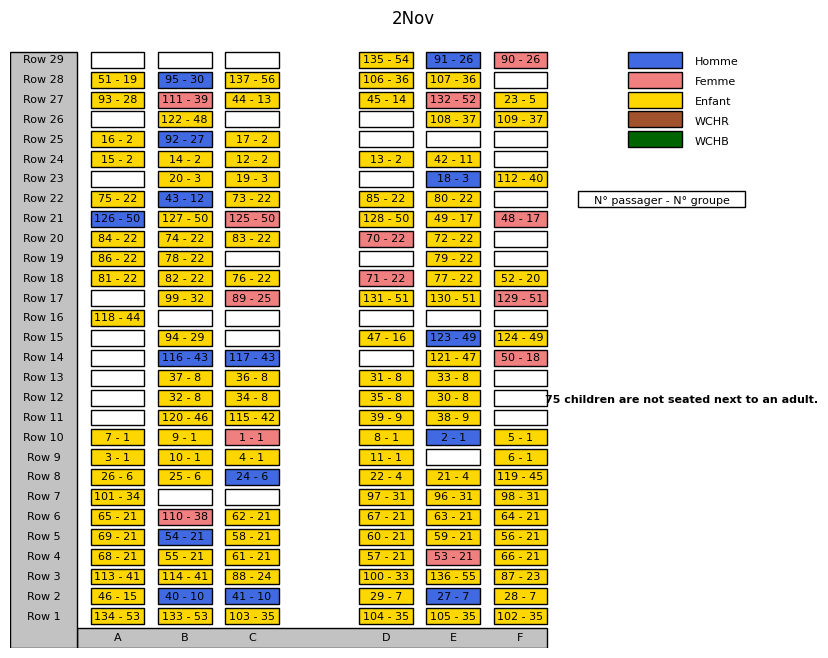

In [35]:
# Create a figure with a size of 10x10 inches
fig, ax = plt.subplots(figsize=(10.4, 8 + 2*(csv_file == "7Nov.csv")))

# Create a rectangle for the aircraft fuselage
ax.add_patch(plt.Rectangle((10, 0), 70, 10, facecolor='#c2c2c2', edgecolor='black'))
ax.add_patch(plt.Rectangle((0, 0), 10, 300 + 60*(csv_file == "7Nov.csv"), facecolor='#c2c2c2', edgecolor='black'))

# Dictionnaire des codes couleurs
code_couleur = {
    "Homme" : 'royalblue',
    "Femme" : 'lightcoral',
    "Enfant" : 'gold',
    "WCHR" : 'sienna',
    "WCHB" : 'darkgreen'
}

Seats = ["A","B","C","couloir","D","E","F"]


# Create rectangles for the seats
for row in range(1, Nb_rows + 1):
    if row == Nb_business_passengers//4 + 3 and Nb_business_passengers != 0:
     ax.add_patch(plt.Rectangle((10, y-1), 70, 0.5, fill=True,facecolor ='black', edgecolor='black'))

    for col in range(1, Nb_rows2 + 1):
        if (col == 4) or ((col == 2 or col == 6) and row <= Nb_business_passengers//4 + 1 and Nb_business_passengers != 0) :
            continue  # Skip over the aisles and business cabine fake seats
        x = 12 + (col - 1) * 10
        y = 12 + (row - 1) * 10

        if A[row-1 , col-1] == 0 :
            ax.add_patch(plt.Rectangle((x, y), 8, 8, fill=False, edgecolor='black'))
        else :
            ax.add_patch(plt.Rectangle((x, y), 8, 8, fill=True,facecolor =code_couleur[Passengers[A[row-1 , col-1]]['Type']], edgecolor='black'))

        # Plotting the passenger number and there group on the seat
        if A[row-1 , col-1] == 0 :
            plt.text(x + 4, y + 4, " ", ha='center', va='center', fontsize=8)
        else :
            seat_label = f"{int(A[row-1 , col-1])} - {Passengers[A[row-1 , col-1]]['Numero de groupe']}" 
            plt.text(x + 4, y + 4, seat_label, ha='center', va='center', fontsize=8)

# adding legend
for index, type in enumerate(code_couleur.keys()):
    ax.add_patch(plt.Rectangle((x + 20, y - 10*index), 8, 8, fill=True,facecolor =code_couleur[type], edgecolor='black'))
    plt.text(x + 30, y - 10*index + 3, type, ha='left', va='center', fontsize=8)

# adding rectangle to explain the numbers in each seat : Passenger number and Group ID
ax.add_patch(plt.Rectangle((x + 12.5, y - 70), 25, 8, fill=False, edgecolor='black'))
plt.text(x + 25, y - 67, "N° passager - N° groupe", ha='center', va='center', fontsize=8)

# Plotting child results and client satisfaction
plt.text(x + 28, y - 167, child_result,fontweight='bold', ha='center', va='center', fontsize=8)
# plt.text(x + 28, y - 177, satisfaction_client,fontweight='bold', ha='center', va='center', fontsize=8)


# Label the rows and columns
for row in range(1, Nb_rows + 1):
    y = 12 + (row - 1) * 10
    plt.text(5, y + 4, f"Row {row}", ha='center', va='center', fontsize=8)
for col in range(1, Nb_rows2 + 1):
    if col == 4:
        continue  # Skip over the aisles
    
    x = 12 + (col - 1) * 10
    plt.text(x + 4, 5, Seats[col-1], ha='center', va='center', fontsize=8)

# Set the limits of the plot and remove the axes
ax.set_xlim(0, 120)
ax.set_ylim(0, 310 + 60*(csv_file == "7Nov.csv"))
ax.axis('off')
# plt.legend(loc='upper right')
plt.title(date)


plt.show()
fig.savefig(f'{data_file[:-4]}.png')